# Shipboard ADCP Data 

## Drifter and VMP process sections 

In [1]:
import pandas as pd
import numpy as np
import scipy.io as spio
import matplotlib
import matplotlib.pyplot as plt
import cmocean as cm
import cmocean.cm as cmo
import cartopy.feature as cfeature
from mpl_toolkits.mplot3d import axes3d
import cartopy.crs as ccrs
import xarray as xr
import matplotlib.dates as mdates

font = {'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)


def rot_ticks(axs,rot,ha):
    for xlabels in axs.get_xticklabels():
                xlabels.set_rotation(rot)
                xlabels.set_ha(ha)
                
                

In [2]:
ds = xr.open_dataset("os150nb.nc")

In [3]:
#can only run this once
ds['depth'] = ds['depth'].isel(time=0)
ds = ds.swap_dims({"depth_cell":"depth"})


## Drifter Plots

Drifter Deployment 1

<br>
March 6 2023 - 16:39:44 <br>
March 6 2023 - 20:35:41

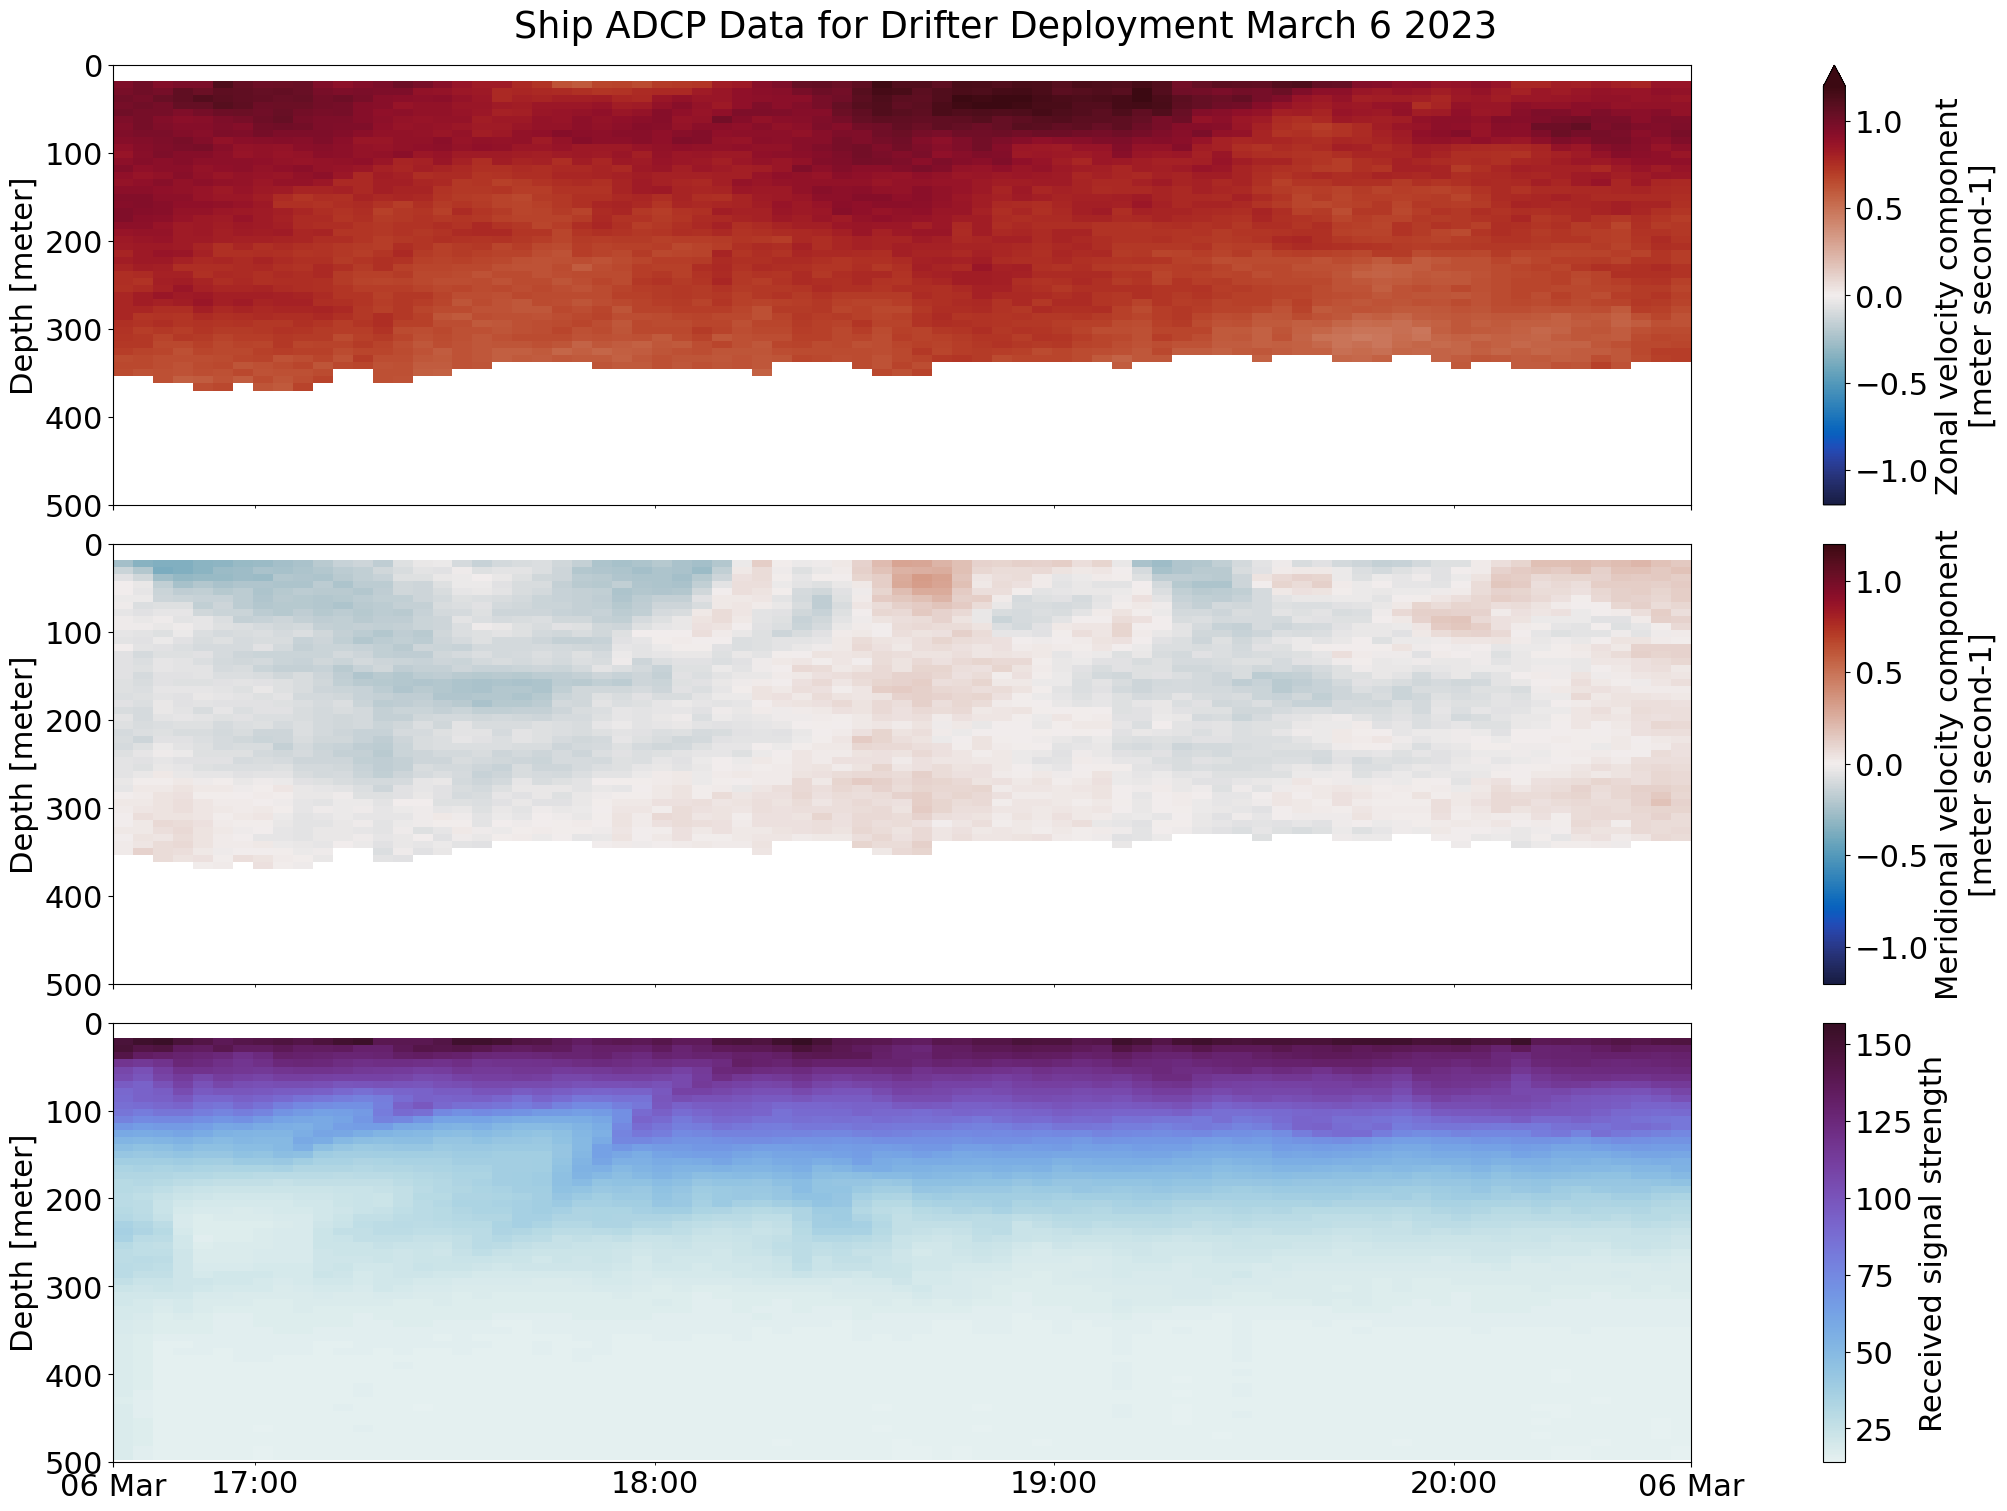

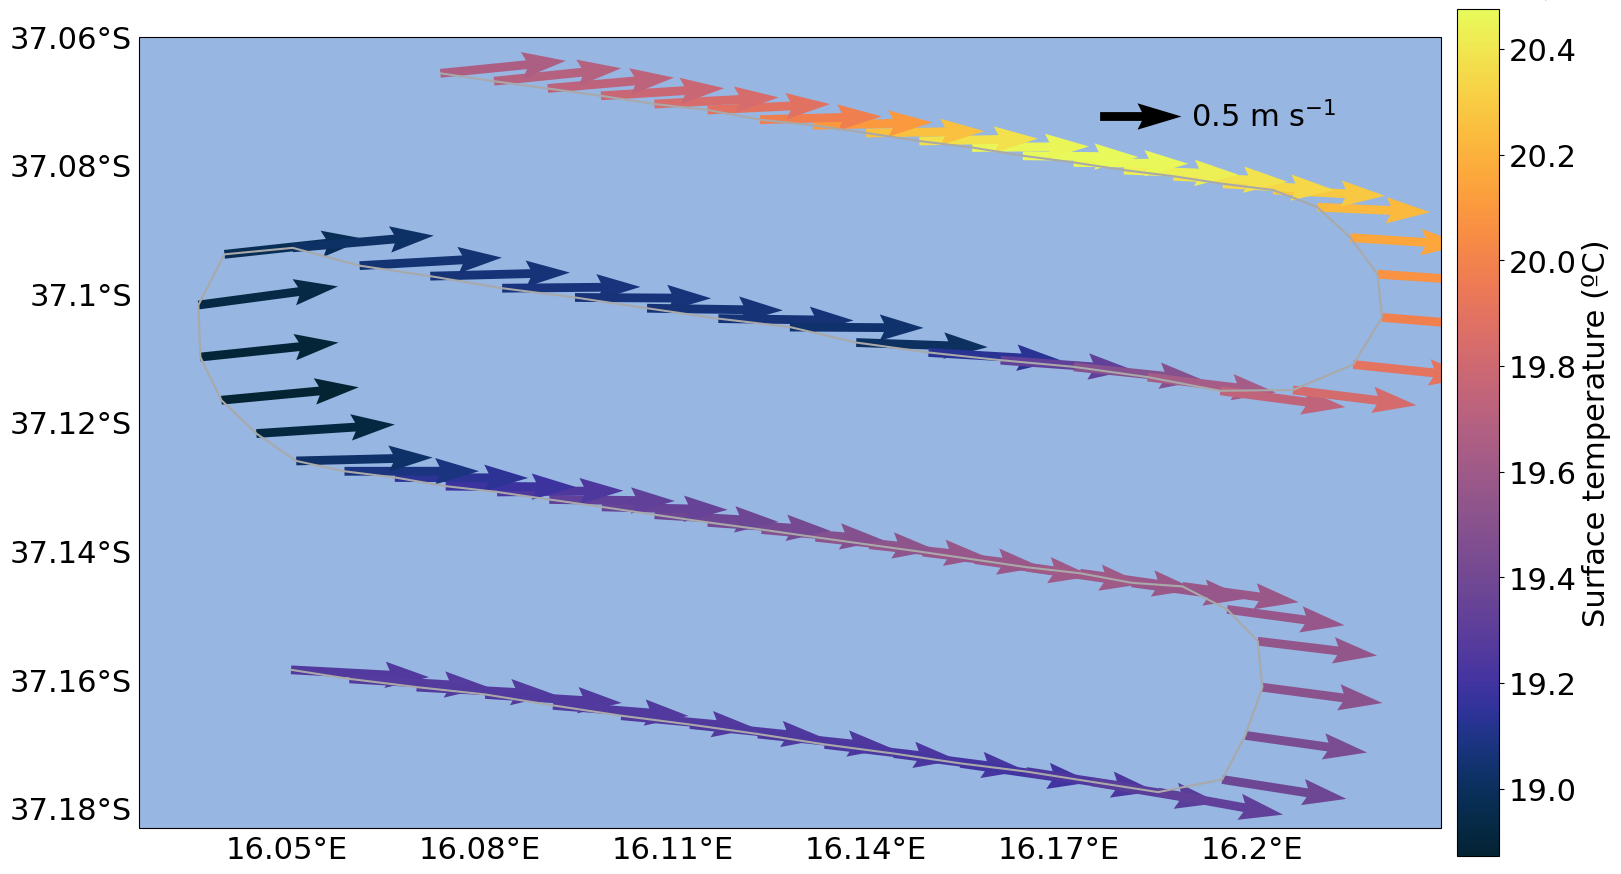

In [12]:
drifter1 = ds.sel(time=slice("2023-03-06T16:39:00", "2023-03-06T20:36:00"))


fig, (ax, bx, cx) = plt.subplots(3, 1, figsize=(20,15), sharex= True, constrained_layout = True)

var = ['u', 'v']

for i, vari in enumerate(var):
    drifter1[vari].plot(y="depth", ylim=(500,0), vmin=-1.2, vmax=1.2, cmap="cmo.balance", ax=[ax, bx][i])
    #vmp1.where(vmp1['pg']>85)[vari].plot(y="depth", ylim=(500,0), vmin=-1, vmax=1, cmap="cmo.balance", ax=[ax, bx][i])

drifter1["amp"].plot(y="depth", ylim=(500,0), cmap="cmo.dense", ax=cx)
    
fig.suptitle("Ship ADCP Data for Drifter Deployment March 6 2023")
cx.xaxis.set_major_locator(mdates.DayLocator())
cx.xaxis.set_minor_locator(mdates.HourLocator(np.arange(0,24,1)))
cx.xaxis.set_major_formatter(mdates.DateFormatter("%d %b"))
cx.xaxis.set_minor_formatter(mdates.DateFormatter("%H:%M"))
rot_ticks(cx, 0, 'center')

ax.set(xlabel=None)
bx.set(xlabel=None)
cx.set(xlabel=None)

fig, ax = plt.subplots(figsize=(20,11), subplot_kw={"projection":ccrs.PlateCarree()})
ax.plot(drifter1.lon, drifter1.lat, c="darkgrey")
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)
gl = ax.gridlines(lw =0, 
                  draw_labels=True)
gl.top_labels = False
gl.right_labels = False
quivplt = drifter1.isel(time=np.arange(0,len(drifter1.time),1),
        depth=slice(0,100)).mean('depth').plot.quiver(x='lon',
                                                      y='lat',
                                                      u='u',
                                                      v='v',
                                                      scale=8,
                                                      pivot='tail', #make the arrow pivot on the tail
                                                      hue="tr_temp", 
                                                      cmap="cmo.thermal",
                                                        cbar_kwargs={'pad':0.01,'label':'Surface temperature (ºC)'})
qk = ax.quiverkey(quivplt, 0.8, 0.9, 0.5, '0.5 m s$^{-1}$', labelpos='E',
                   coordinates='axes',zorder=6,color='k')

Drifter Deployment 2

<br>
March 11 2023 - 00:29:12 <br>
March 11 2023 - 03:49:05

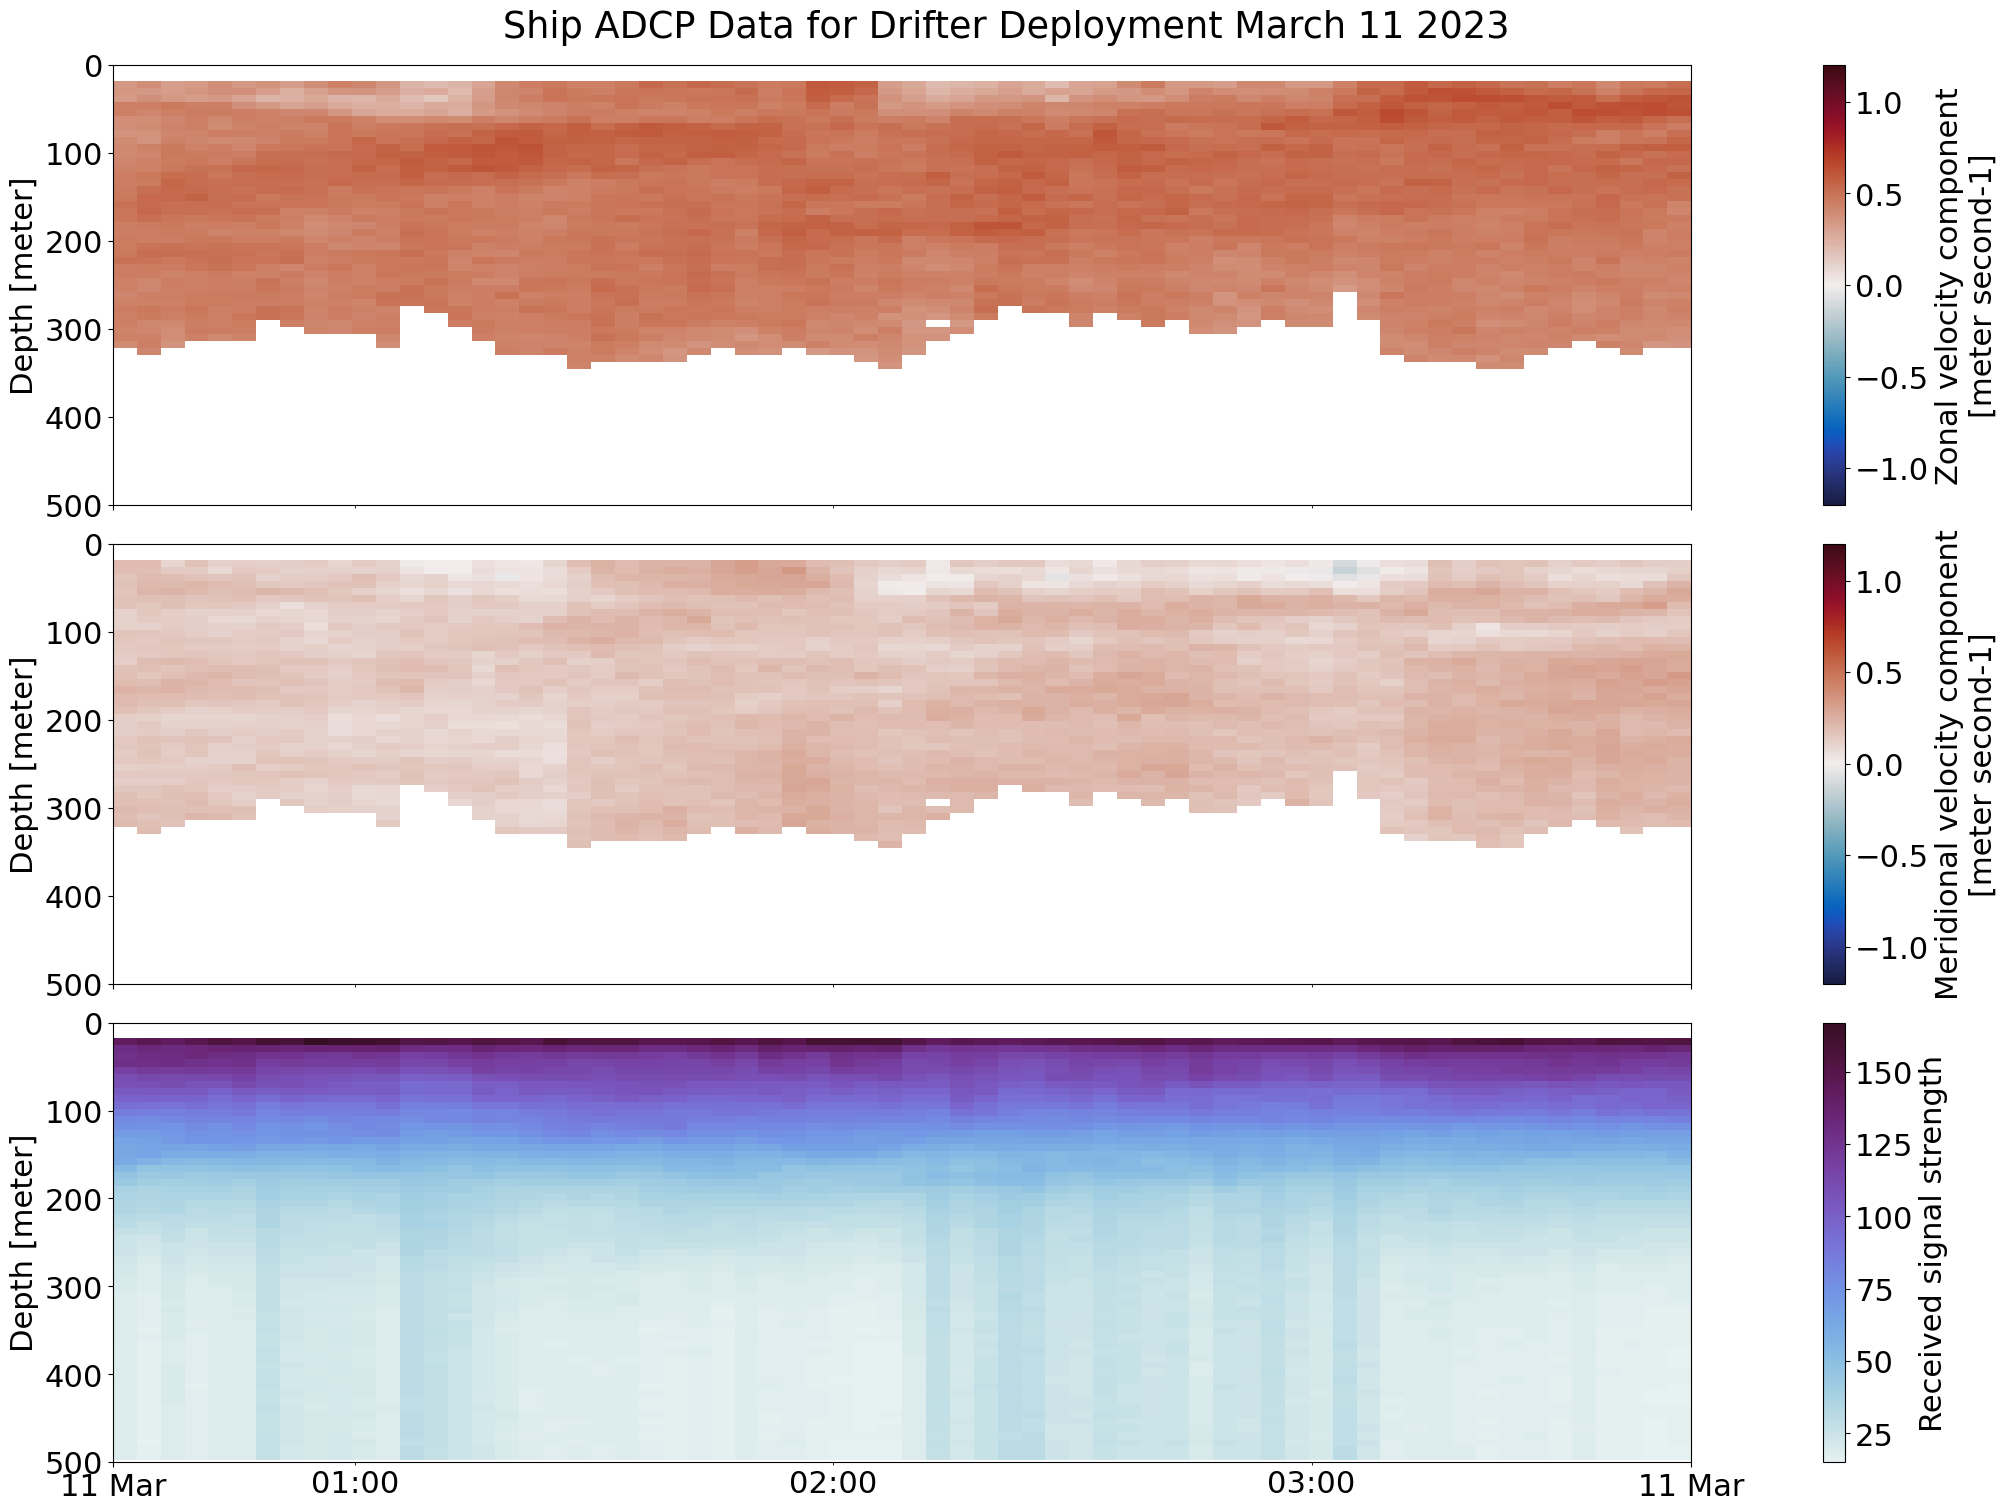

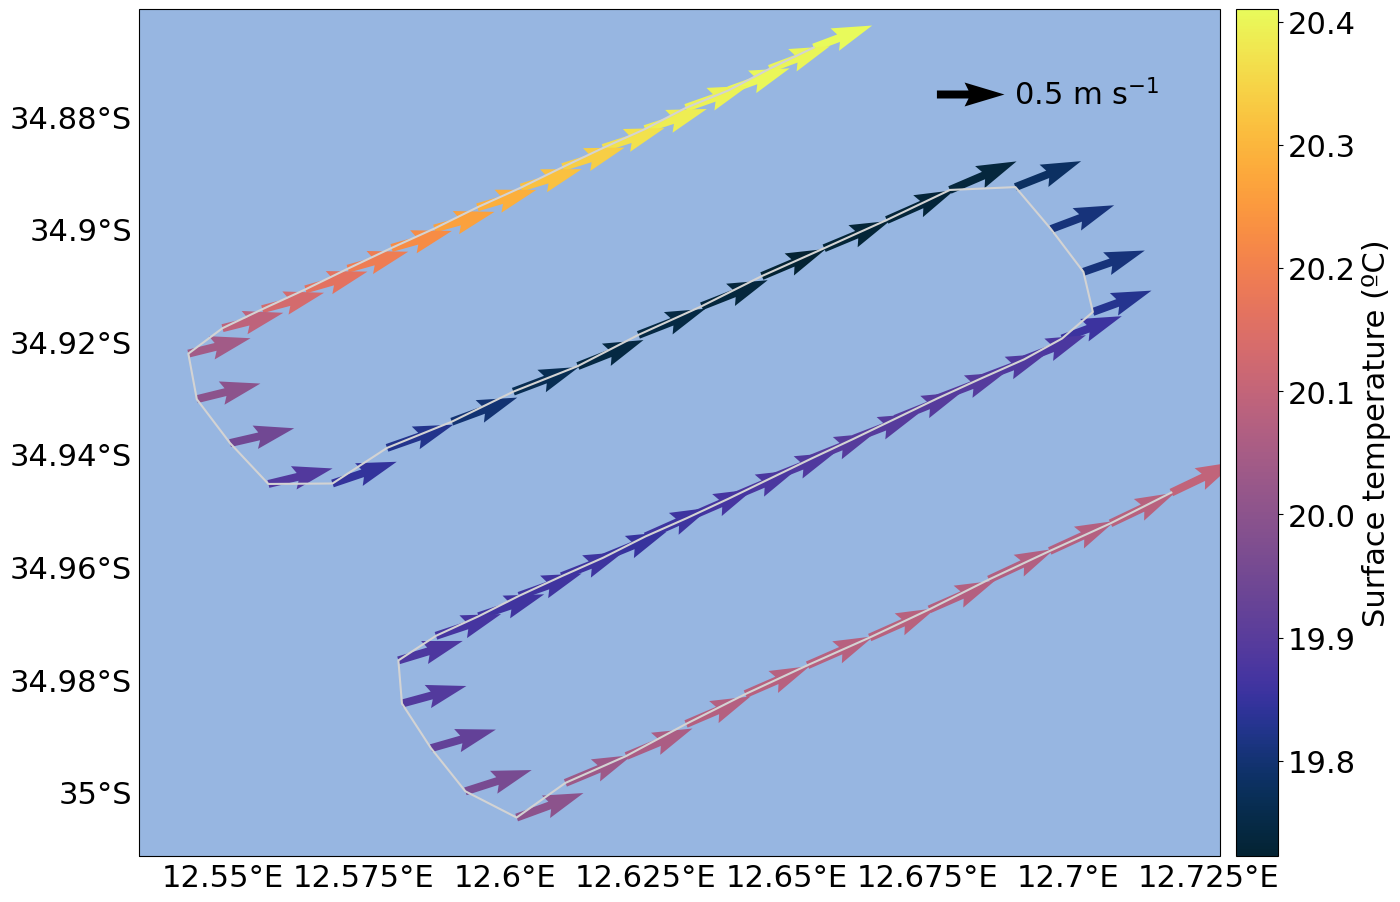

In [13]:
drifter2 = ds.sel(time=slice("2023-03-11T00:29:00", "2023-03-11T03:47:00"))


fig, (ax, bx, cx) = plt.subplots(3, 1, figsize=(20,15), sharex= True, constrained_layout = True)

var = ['u', 'v']

for i, vari in enumerate(var):
    drifter2[vari].plot(y="depth", ylim=(500,0), vmin=-1.2, vmax=1.2, cmap="cmo.balance", ax=[ax, bx][i])
    #vmp1.where(vmp1['pg']>85)[vari].plot(y="depth", ylim=(500,0), vmin=-1, vmax=1, cmap="cmo.balance", ax=[ax, bx][i])

drifter2["amp"].plot(y="depth", ylim=(500,0), cmap="cmo.dense", ax=cx)
    
fig.suptitle("Ship ADCP Data for Drifter Deployment March 11 2023")
cx.xaxis.set_major_locator(mdates.DayLocator())
cx.xaxis.set_minor_locator(mdates.HourLocator(np.arange(0,24,1)))
cx.xaxis.set_major_formatter(mdates.DateFormatter("%d %b"))
cx.xaxis.set_minor_formatter(mdates.DateFormatter("%H:%M"))
rot_ticks(cx, 0, 'center')

ax.set(xlabel=None)
bx.set(xlabel=None)
cx.set(xlabel=None)

fig, ax = plt.subplots(figsize=(20,11), subplot_kw={"projection":ccrs.PlateCarree()})
ax.plot(drifter2.lon, drifter2.lat, c="lightgrey")
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)
gl = ax.gridlines(lw =0, 
                  draw_labels=True)
gl.top_labels = False
gl.right_labels = False
quivplt = drifter2.isel(time=np.arange(0,len(drifter2.time),1),
        depth=slice(0,100)).mean('depth').plot.quiver(x='lon',
                                                      y='lat',
                                                      u='u',
                                                      v='v',
                                                      scale=8,
                                                      pivot='tail', #make the arrow pivot on the tail
                                                      hue="tr_temp", 
                                                      cmap="cmo.thermal",
                                                        cbar_kwargs={'pad':0.01,'label':'Surface temperature (ºC)'})

qk = ax.quiverkey(quivplt, 0.8, 0.9, 0.5, '0.5 m s$^{-1}$', labelpos='E',
                   coordinates='axes',zorder=6,color='k')
#ax.set_extent([16,16.5,-37.25,-36.9])

Drifter Deployment 3

<br>
March 19 2023 - 12:35:14 <br>
March 19 2023 - 15:21:59

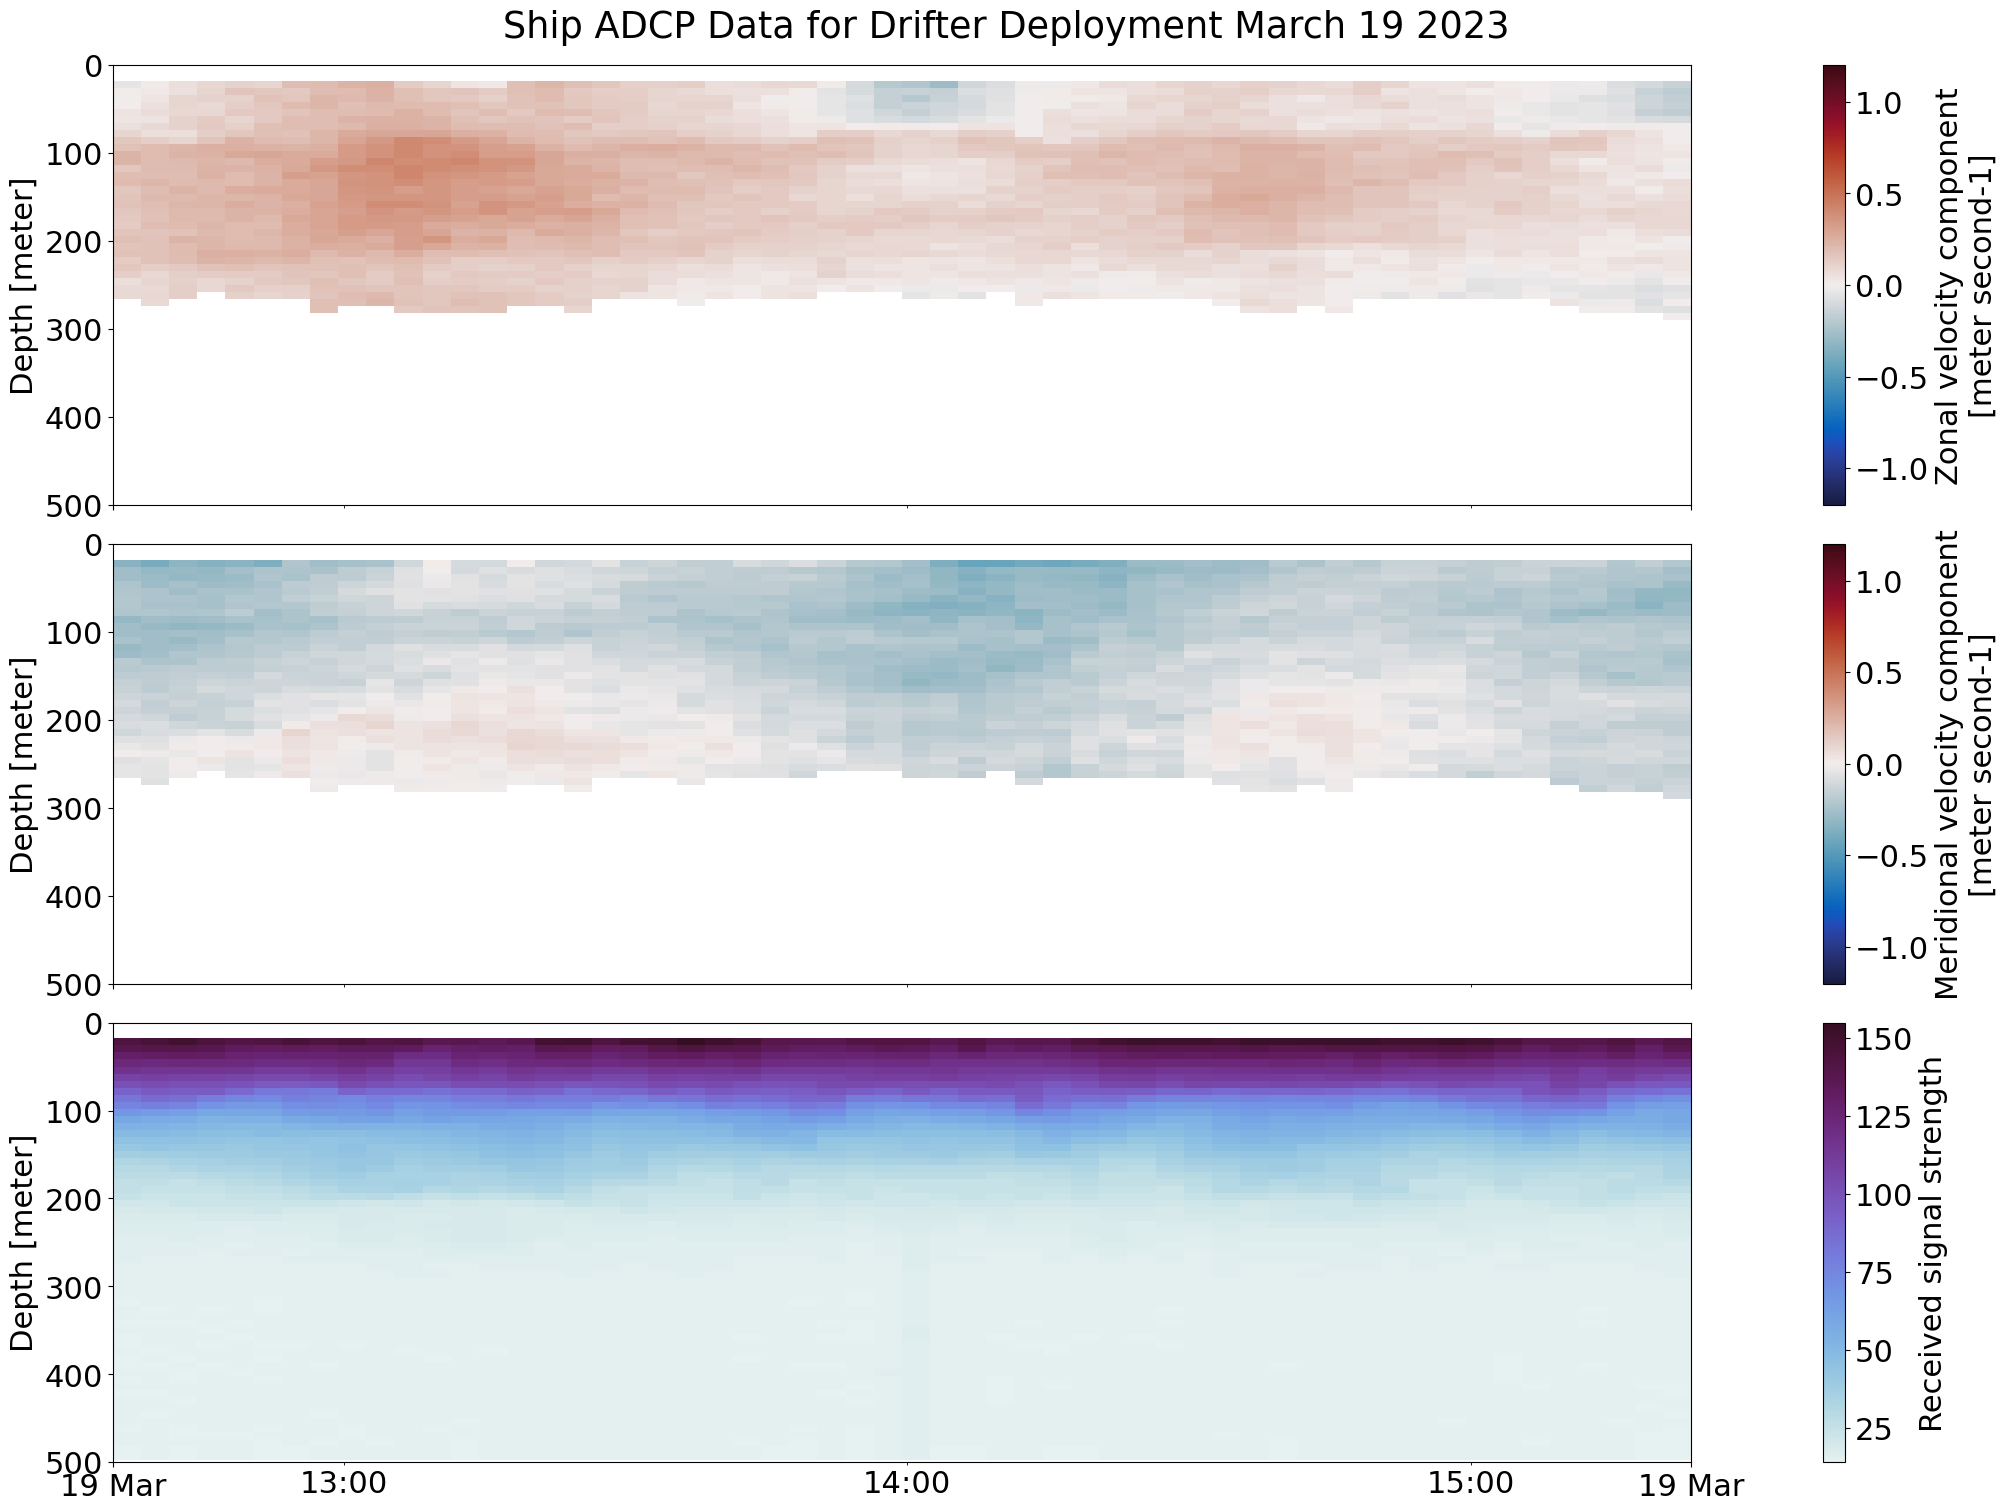

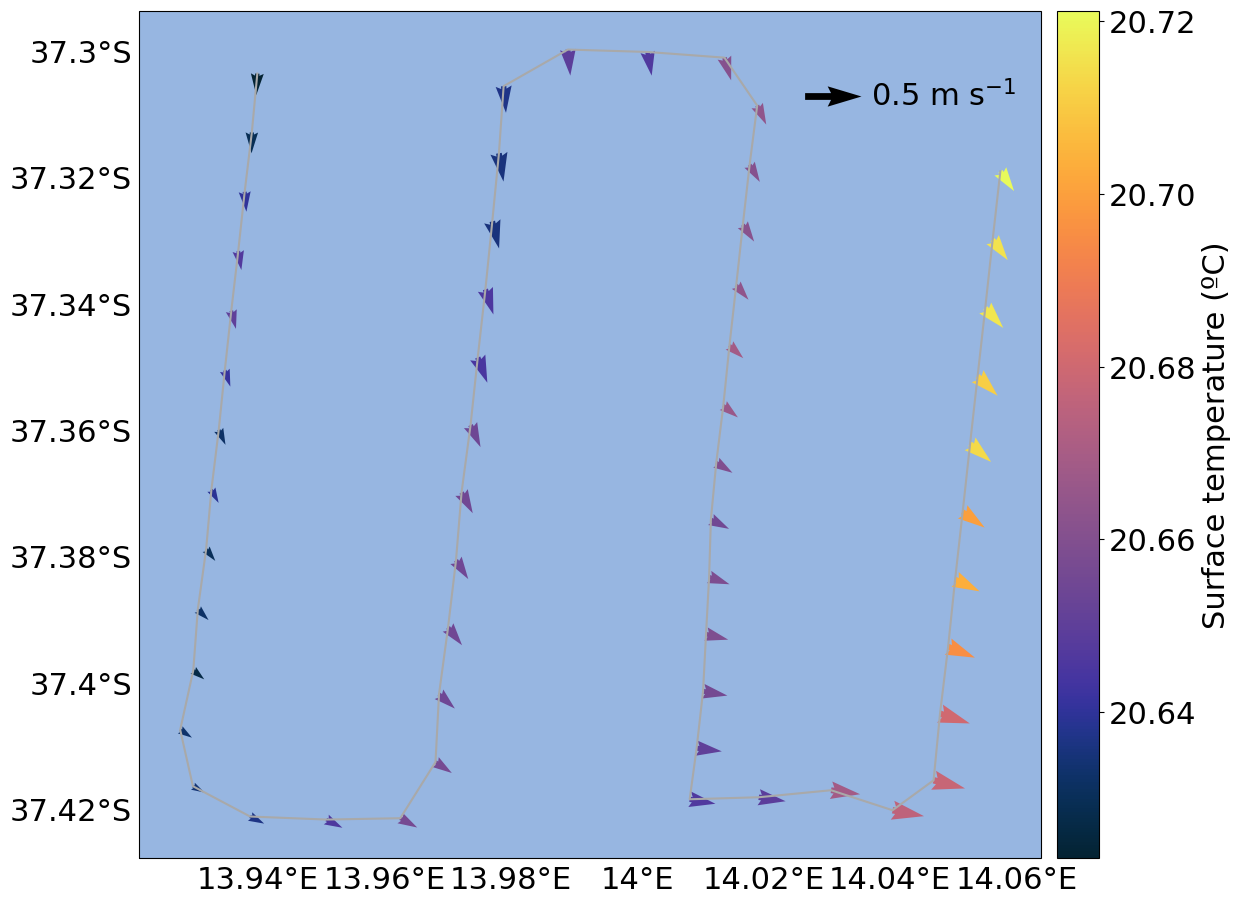

In [14]:
drifter3 = ds.sel(time=slice("2023-03-19T12:34:00", "2023-03-19T15:23:00"))


fig, (ax, bx, cx) = plt.subplots(3, 1, figsize=(20,15), sharex= True, constrained_layout = True)

var = ['u', 'v']

for i, vari in enumerate(var):
    drifter3[vari].plot(y="depth", ylim=(500,0), vmin=-1.2, vmax=1.2, cmap="cmo.balance", ax=[ax, bx][i])
    #vmp1.where(vmp1['pg']>85)[vari].plot(y="depth", ylim=(500,0), vmin=-1, vmax=1, cmap="cmo.balance", ax=[ax, bx][i])

drifter3["amp"].plot(y="depth", ylim=(500,0), cmap="cmo.dense", ax=cx)
    
fig.suptitle("Ship ADCP Data for Drifter Deployment March 19 2023")
cx.xaxis.set_major_locator(mdates.DayLocator())
cx.xaxis.set_minor_locator(mdates.HourLocator(np.arange(0,24,1)))
cx.xaxis.set_major_formatter(mdates.DateFormatter("%d %b"))
cx.xaxis.set_minor_formatter(mdates.DateFormatter("%H:%M"))
rot_ticks(cx, 0, 'center')

ax.set(xlabel=None)
bx.set(xlabel=None)
cx.set(xlabel=None)

fig, ax = plt.subplots(figsize=(20,11), subplot_kw={"projection":ccrs.PlateCarree()})
ax.plot(drifter3.lon, drifter3.lat, c="darkgrey")
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)
gl = ax.gridlines(lw =0, 
                  draw_labels=True)
gl.top_labels = False
gl.right_labels = False
quivplt = drifter3.isel(time=np.arange(0,len(drifter3.time),1),
          depth=slice(0,100)).mean('depth').plot.quiver(x='lon',
                                                      y='lat',
                                                      u='u',
                                                      v='v',
                                                      scale=8,
                                                      pivot='tail', #make the arrow pivot on the tail
                                                      hue="tr_temp",
                                                      cmap="cmo.thermal",
                                                        cbar_kwargs={'pad':0.01,'label':'Surface temperature (ºC)'})


qk = ax.quiverkey(quivplt, 0.8, 0.9, 0.5, '0.5 m s$^{-1}$', labelpos='E',
                   coordinates='axes',zorder=6,color='k')

Drifter Deployment 4

<br>
March 25 2023 - 13:18:34 <br>
March 25 2023 - 16:19:08

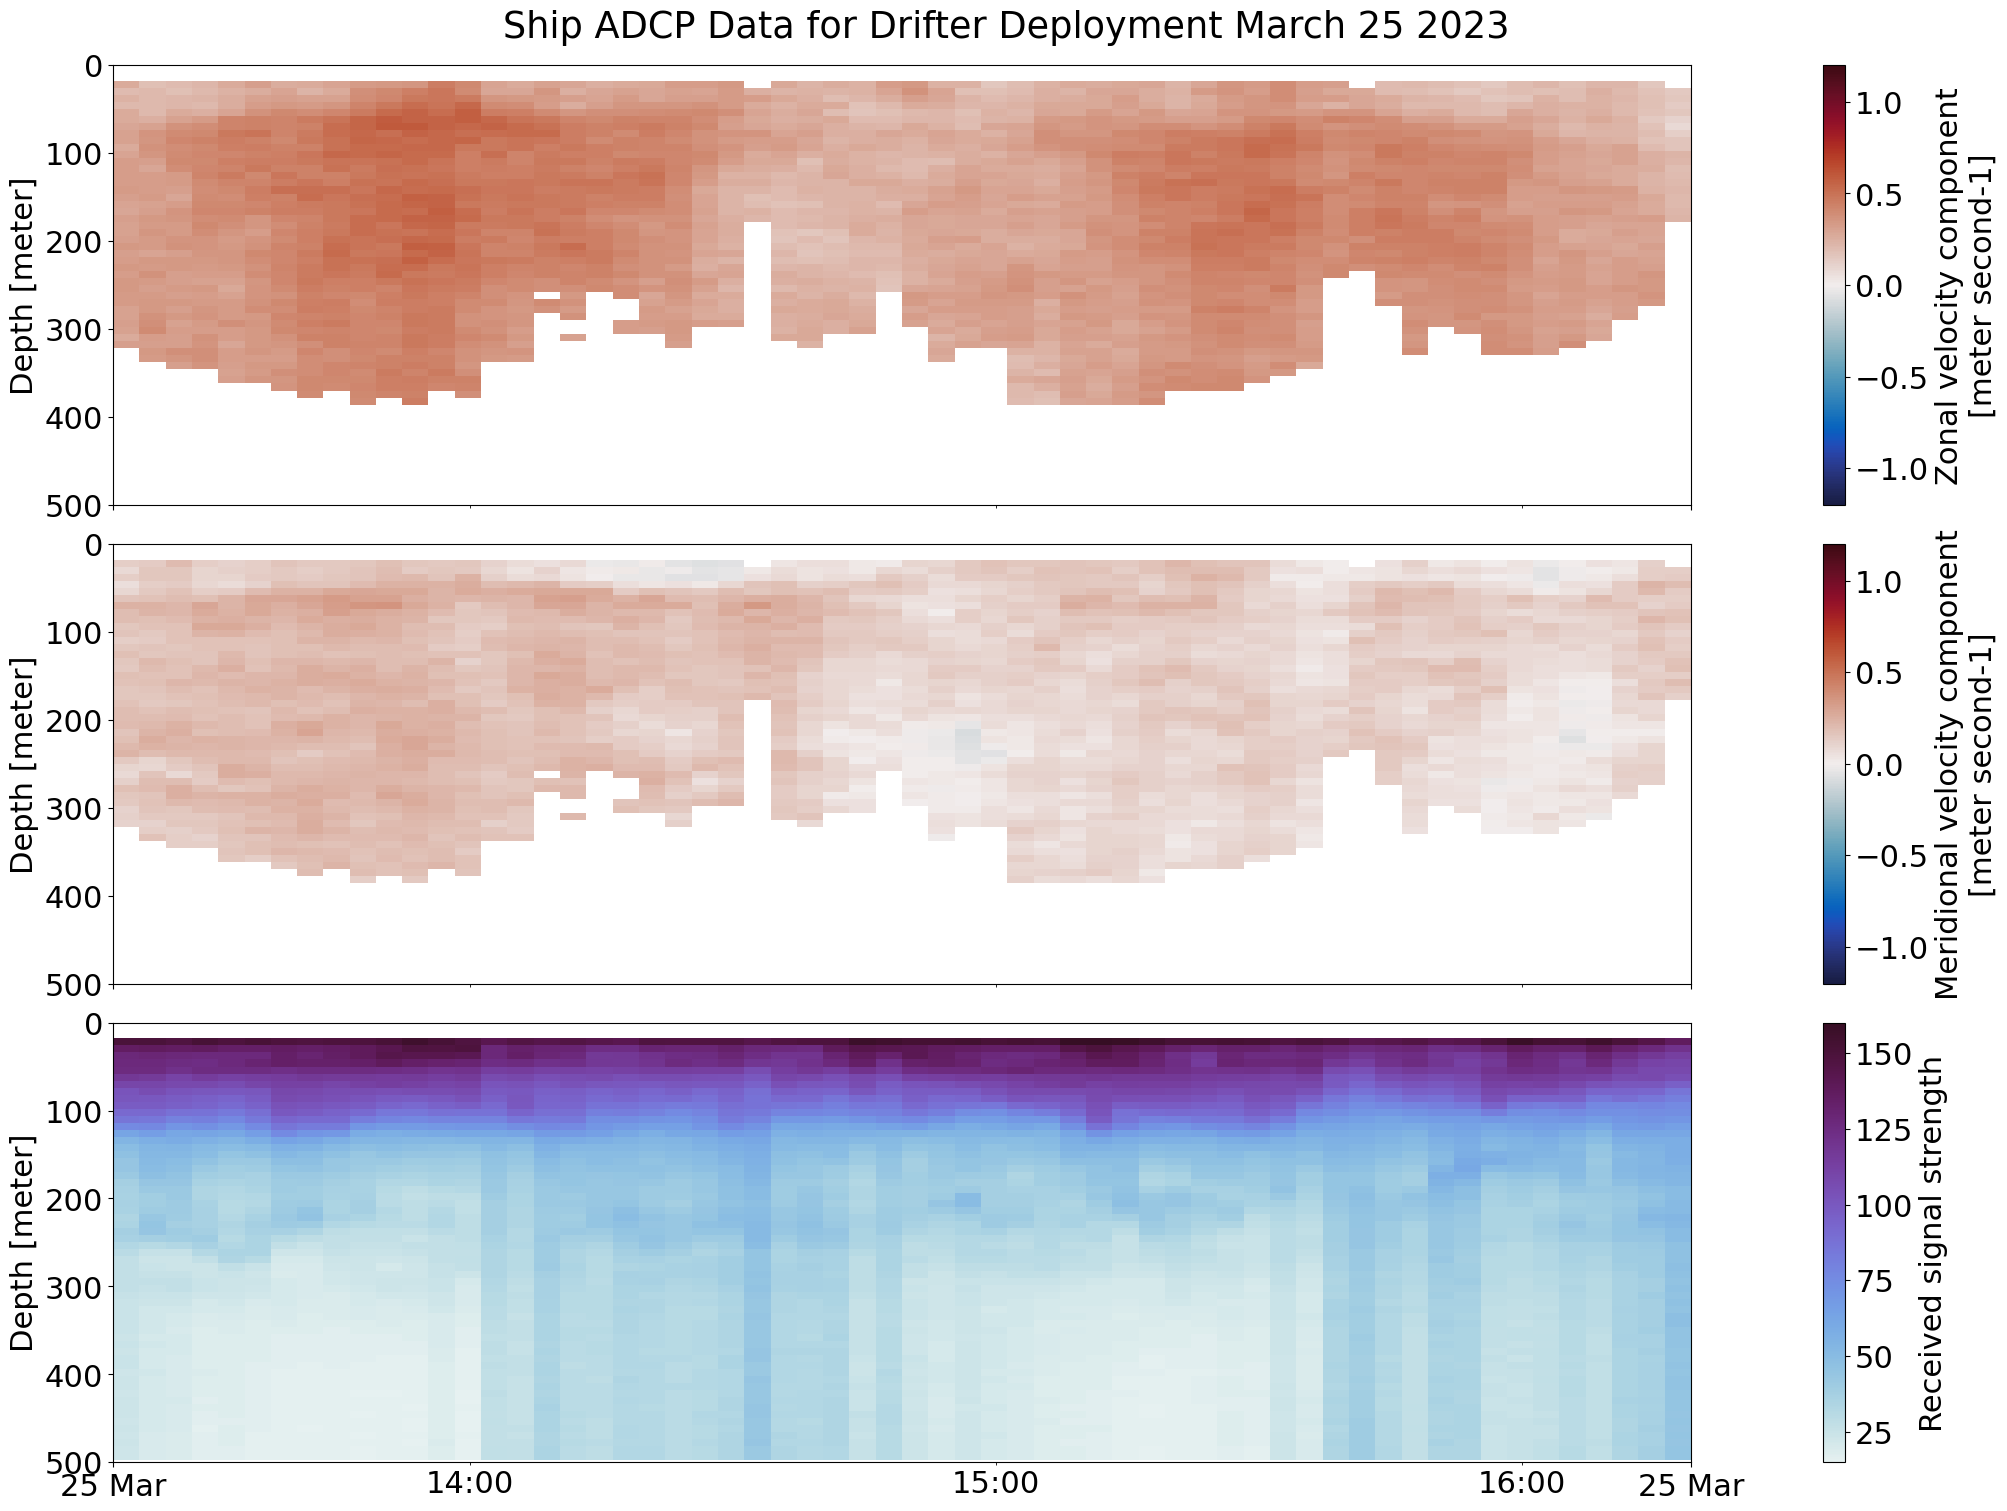

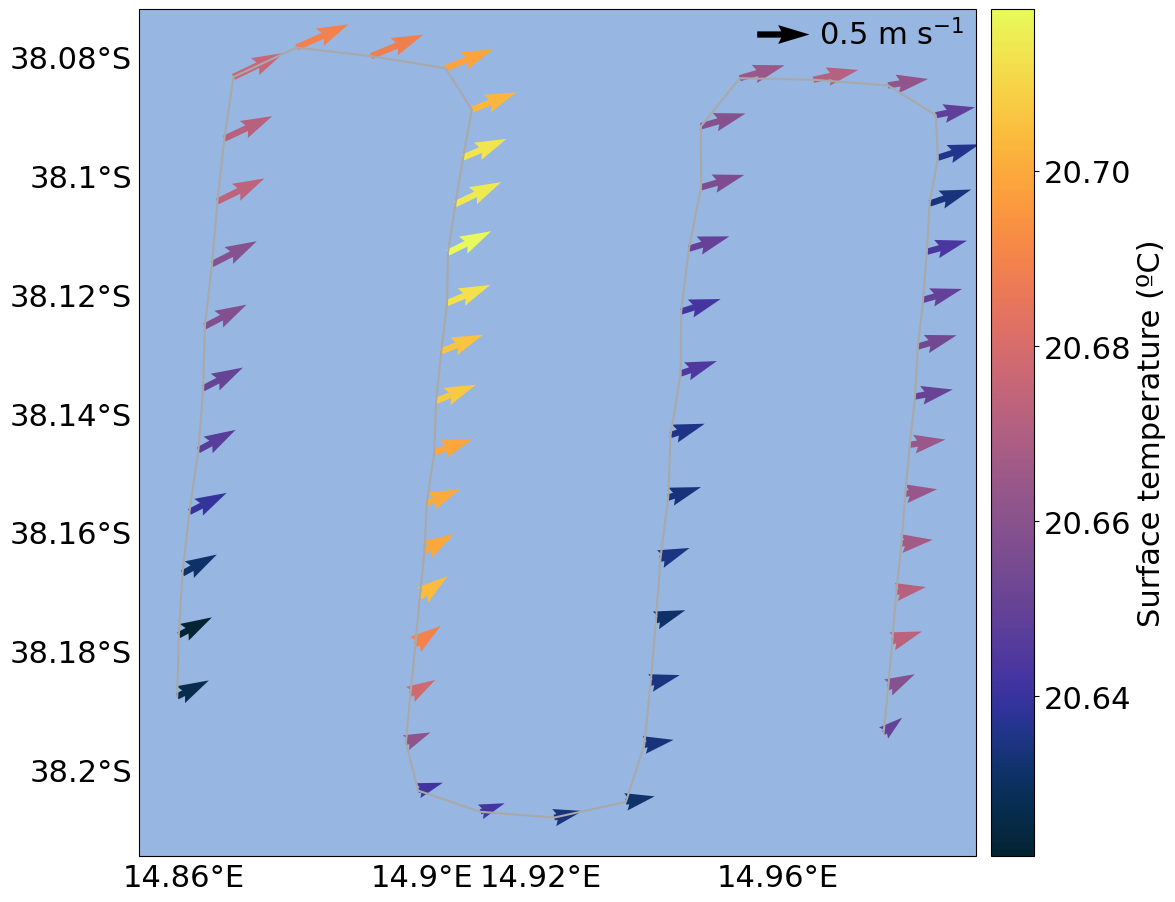

In [15]:
drifter4 = ds.sel(time=slice("2023-03-25T13:18:00", "2023-03-25T16:20:00"))

fig, (ax, bx, cx) = plt.subplots(3, 1, figsize=(20,15), sharex= True, constrained_layout = True)

var = ['u', 'v']

for i, vari in enumerate(var):
    drifter4[vari].plot(y="depth", ylim=(500,0), vmin=-1.2, vmax=1.2, cmap="cmo.balance", ax=[ax, bx][i])
    #vmp1.where(vmp1['pg']>85)[vari].plot(y="depth", ylim=(500,0), vmin=-1, vmax=1, cmap="cmo.balance", ax=[ax, bx][i])

drifter4["amp"].plot(y="depth", ylim=(500,0), cmap="cmo.dense", ax=cx)
    
fig.suptitle("Ship ADCP Data for Drifter Deployment March 25 2023")
cx.xaxis.set_major_locator(mdates.DayLocator())
cx.xaxis.set_minor_locator(mdates.HourLocator(np.arange(0,24,1)))
cx.xaxis.set_major_formatter(mdates.DateFormatter("%d %b"))
cx.xaxis.set_minor_formatter(mdates.DateFormatter("%H:%M"))
rot_ticks(cx, 0, 'center')

ax.set(xlabel=None)
bx.set(xlabel=None)
cx.set(xlabel=None)

fig, ax = plt.subplots(figsize=(20,11), subplot_kw={"projection":ccrs.PlateCarree()})
ax.plot(drifter4.lon, drifter4.lat, c="darkgrey")
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)
gl = ax.gridlines(lw =0, 
                  draw_labels=True)
gl.top_labels = False
gl.right_labels = False
quivplt = drifter4.isel(time=np.arange(0,len(drifter4.time),1),
          depth=slice(0,100)).mean('depth').plot.quiver(x='lon',
                                                      y='lat',
                                                      u='u',
                                                      v='v',
                                                      scale=8,
                                                      pivot='tail', #make the arrow pivot on the tail
                                                      hue="tr_temp",
                                                      cmap="cmo.thermal",
                                                        cbar_kwargs={'pad':0.01,'label':'Surface temperature (ºC)'})

qk = ax.quiverkey(quivplt, 0.8, 0.97, 0.5, '0.5 m s$^{-1}$', labelpos='E',
                   coordinates='axes',zorder=6,color='k')
#ax.set_extent([13.45,13.5,-35.93,-35.96])